In this notebook, we implement scikit learn models

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#linear regression: 
from sklearn.linear_model import LinearRegression
import sys 
sys.path.append('./models/')
from LinearRegression import LinearRegressionModel
from BayesianRegression import BayesianRegressionModel



In [2]:
import sys
sys.path.append('./models/')
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])


# importing mobility from the csv file
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([n_hospitalized, n_infectious, mobility_smoothed])





In [4]:
split=200

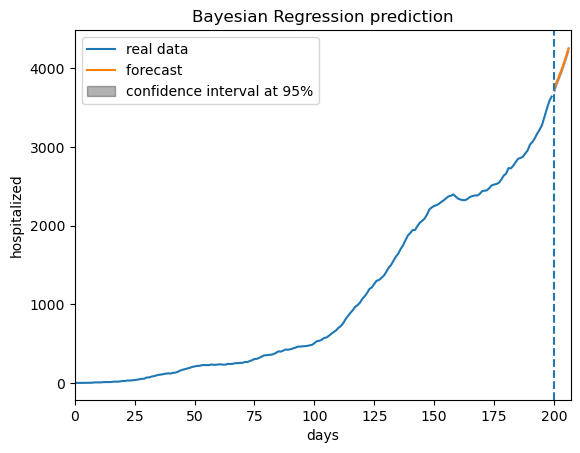

In [5]:
br=BayesianRegressionModel()
br.train([i for i in range(len(n_hospitalized[:split]))], n_hospitalized[:split])   
%matplotlib inline


br.plot(7, 0.05, xlabel='days', ylabel='hospitalized', title='Bayesian Regression prediction')

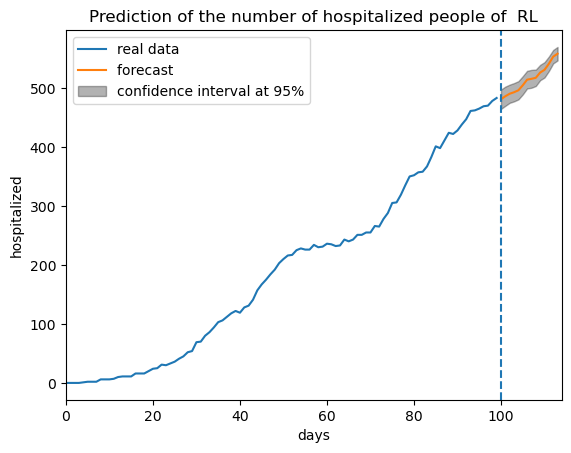

In [7]:
linereg=LinearRegressionModel()
split=100
linereg.train([i for i in range(split)], n_hospitalized[:split])

linereg.plot(14, 0.05, title='Prediction of the number of hospitalized people of  RL', xlabel='days', ylabel='hospitalized')
